In [256]:
import pandas as pd 

data = pd.read_csv("dados.csv")

In [257]:
data.head(n=10)

,01/01/10,Unnamed: 1
0,01/01/10,NaN
1,01/01/10,NaN
2,01/01/10,NaN
3,01/01/10,NaN
4,01/01/10,NaN
5,01/01/10,0.196292
6,01/01/10,0.196118
7,01/01/10,0.195659
8,01/01/10,0.195073
9,01/01/10,0.397941


In [258]:
data = data.rename(index=str, columns={"01/01/10": "Data", "Unnamed: 1": "Concentracao"});
data.head(n=10)

,Data,Concentracao
0,01/01/10,NaN
1,01/01/10,NaN
2,01/01/10,NaN
3,01/01/10,NaN
4,01/01/10,NaN
5,01/01/10,0.196292
6,01/01/10,0.196118
7,01/01/10,0.195659
8,01/01/10,0.195073
9,01/01/10,0.397941


In [259]:
data['Data'] = pd.to_datetime(data['Data'],format='%d/%m/%y')
data.head(n=30)

,Data,Concentracao
0,2010-01-01,NaN
1,2010-01-01,NaN
2,2010-01-01,NaN
3,2010-01-01,NaN
4,2010-01-01,NaN
5,2010-01-01,0.196292
6,2010-01-01,0.196118
7,2010-01-01,0.195659
8,2010-01-01,0.195073
9,2010-01-01,0.397941


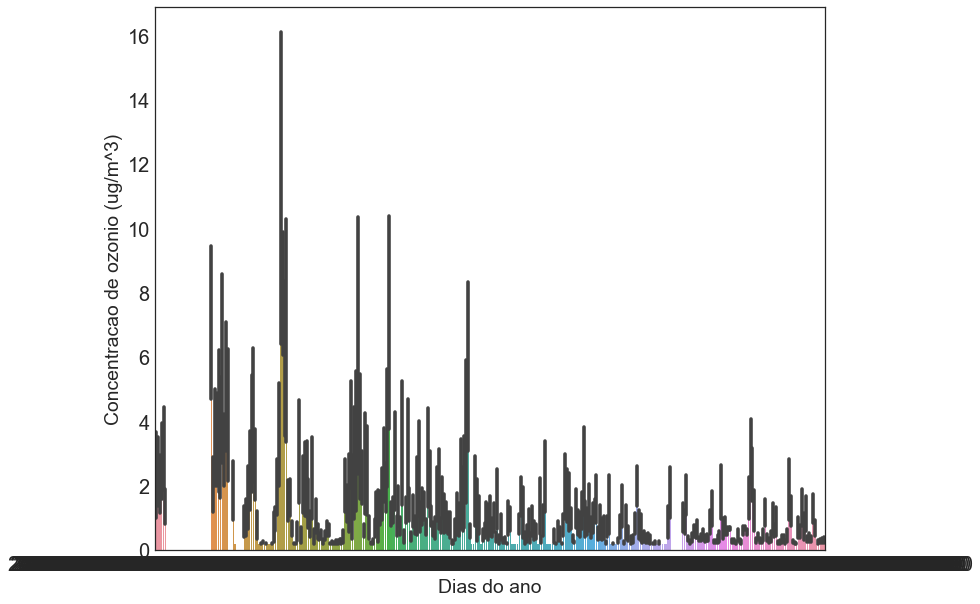

In [260]:
# Primeira plot -- gráfico de todos os dados
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set('paper', 'white', 'colorblind', font_scale=2.2, 
            rc={'lines.linewidth': 2, 
                'figure.figsize': (12.0, 10.0), 
                'image.interpolation': 'nearest', 
                'image.cmap': 'gray'})

plt.rcParams['figure.figsize'] = (12.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
    
    
sns.barplot(x="Data", y="Concentracao", data=data)
plt.xlabel("Dias do ano")
plt.ylabel("Concentracao de ozonio (ug/m^3)")

#saving figure
plt.savefig('primeira.png')


In [261]:
array_medias = np.array([])

for x in range(1, 13):
    df_mes = data[data['Data'].dt.month == x]
    array_medias = np.append(array_medias, df_mes.mean())

array_medias

series_medias = pd.Series(array_medias)
series_medias.head(n = 13)

0     2.917010
1     2.560222
2     2.016406
3     1.323151
4     1.756042
5     1.183860
6     0.653152
7     0.880264
8     0.525262
9     0.552565
10    0.721366
11    0.561778
dtype: float64

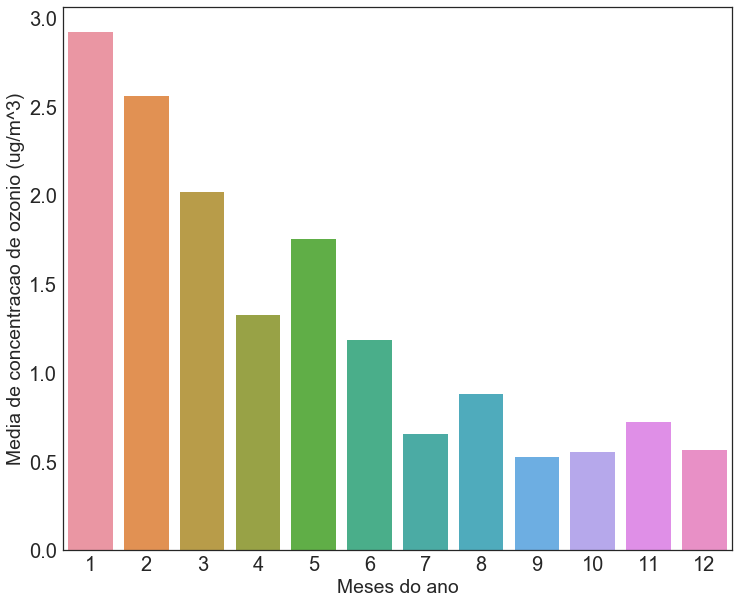

In [262]:
sns.barplot(series_medias.index + 1, series_medias.values)
plt.xlabel("Meses do ano")
plt.ylabel("Media de concentracao de ozonio (ug/m^3)")

#saving figure
plt.savefig('segunda.png')

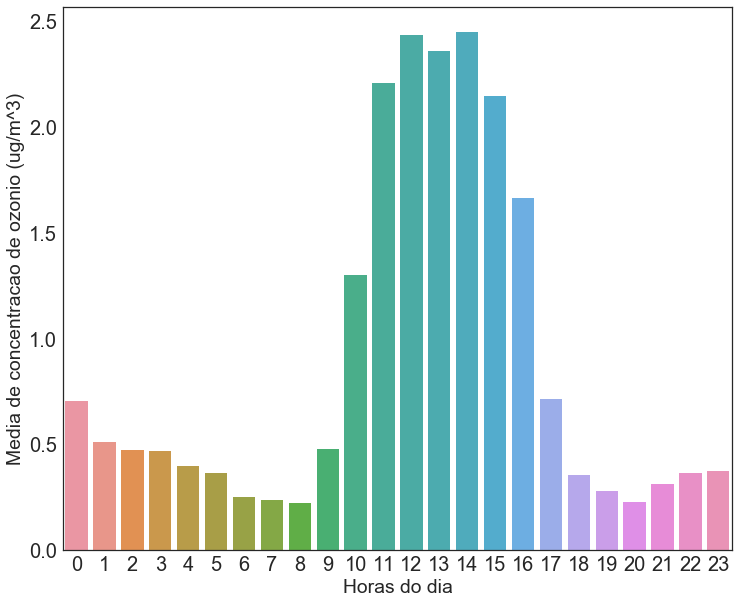

In [263]:
# terceiro plot - media por hora num mes
medias_horarias = np.array([0.7039343934, 0.5124223786, 0.4715411091, 0.4675265881, 0.3962546664, 0.3655164275, 0.2534713874, 0.2353520789, 0.2231580078, 0.4775307831, 1.2997433, 2.205990193, 2.430722864, 2.359034306, 2.444427541, 2.145116898, 1.661257848, 0.7153555554, 0.3569676566, 0.2799608524, 0.2282271738, 0.3119622793, 0.3625108713, 0.3730154105])
series_medias_horarias = pd.Series(medias_horarias)

sns.barplot(series_medias_horarias.index , series_medias_horarias.values)
plt.xlabel("Horas do dia")
plt.ylabel("Media de concentracao de ozonio (ug/m^3)")

#saving figure
plt.savefig('terceira.png')

In [264]:
#quarto - media de cada dia num mes

df_abril = data[data['Data'].dt.month == 5]

array_medias_dias = np.array([])

for x in range(1, 8):
    df_dia = df_abril[df_abril['Data'].dt.day == x]
    array_medias_dias = np.append(array_medias_dias, df_dia.mean())


series_medias_dias_abril = pd.Series(array_medias_dias)

series_medias_dias_abril.head(n=10) #colocando 10 pra ver que vai ate 7 elementos


#o primeiro dia eh um sabado

0    1.252469
1    0.907482
2    1.259080
3    1.707688
4    2.536665
5    1.968596
6    3.690495
dtype: float64

In [265]:
df_medias_dias_abril = series_medias_dias_abril.to_frame(name='medias')

new_col  = ['sabado', 'domingo', 'segunda', 'terca','quarta','quinta','sexta']

df_medias_dias_abril.insert(loc=0,column='dias', value=new_col)

df_medias_dias_abril.set_index(['dias'])

,medias
dias,
sabado,1.252469
domingo,0.907482
segunda,1.259080
terca,1.707688
quarta,2.536665
quinta,1.968596
sexta,3.690495


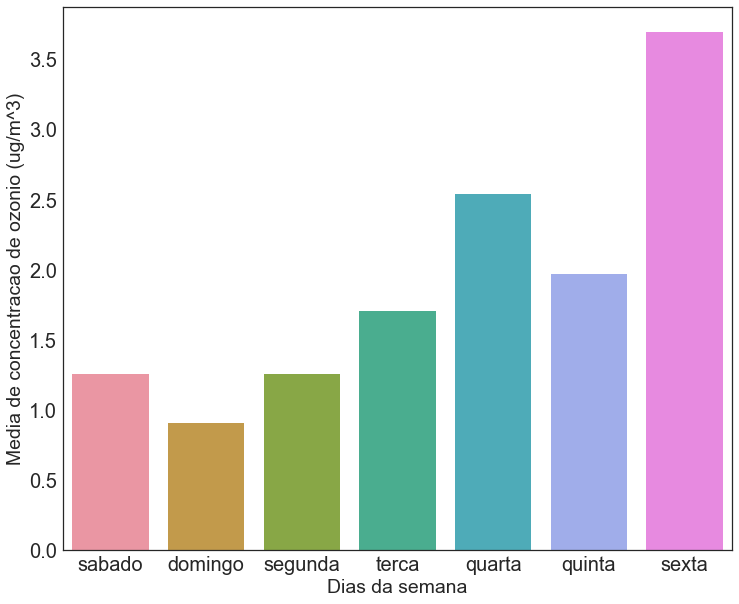

In [266]:
sns.barplot(x="dias", y="medias", data=df_medias_dias_abril)
plt.xlabel("Dias da semana")
plt.ylabel("Media de concentracao de ozonio (ug/m^3)")

#saving figure
plt.savefig('quarta.png')